In [2]:
from dotenv import load_dotenv
import os
import requests
import json
import matplotlib.pyplot as plt

load_dotenv()

True

In [3]:
log = os.getenv("login")
pwd = os.getenv("password")
auth_resp = requests.get(f"https://registrator-mic-back.venom56.ru/authenticate?login={log}&password={pwd}")
print(auth_resp)
coocies = auth_resp.headers["Set-Cookie"]
coocies_split = coocies.split("; ")
token = coocies_split[0]
point_count = 40




<Response [200]>


Образец сырого ответа функции get_interval_data
{"data-by-timestamp":{"2025-07-09T11:44:30+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.000026332815},"2025-07-09T11:44:32+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.000024049448},"2025-07-09T11:44:34+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.00002696647},"2025-07-09T11:44:36+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.00020646684},"2025-07-09T11:44:38+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.00024418693},"2025-07-09T11:44:40+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.00023681002},"2025-07-09T11:44:42+05:00":{"SDCardState":0,"NumOfIntervals":40,"WidthOfIntervals":50,"IntervalIdx":0,"Value":0.00023551636},"2025-07-09T11:44:44+05:00":{"SDCardState":0,"

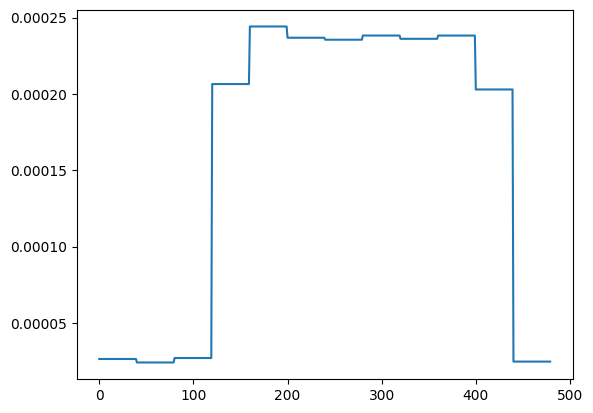

In [6]:
dt_from = "2025-07-09T06:44:30Z"
dt_to = "2025-07-09T06:44:52Z"

interval = 0
interval_url = f"https://registrator-mic-back.venom56.ru/get_interval_data?id=2025032300&from={dt_from}&to={dt_to}&interval={interval}&num_intervals=40"
headers = {"Cookie": token}

# data_dict необходим для отслеживания времени
data_dict = dict()
dataset = []

example_response = requests.get(url=interval_url, headers=headers).text
print("Образец сырого ответа функции get_interval_data")
print(example_response)

for interval in range(0, point_count):
    interval_txt = requests.get(url=interval_url, headers=headers).text
    interval_data = json.loads(interval_txt)["data-by-timestamp"]
    for key, val in interval_data.items():
        data_dict.setdefault(key, []).append(val["Value"])
print()
print("Ключи (отметки времени), полученные из запроса")
print("Каждому ключу соответствует 40 значений Value из 40-ка каналов")
print(data_dict.keys())
for val in data_dict.values():
    assert(len(val) == point_count)
    dataset.extend(val)
    
print(len(dataset))    
plt.plot(dataset)
